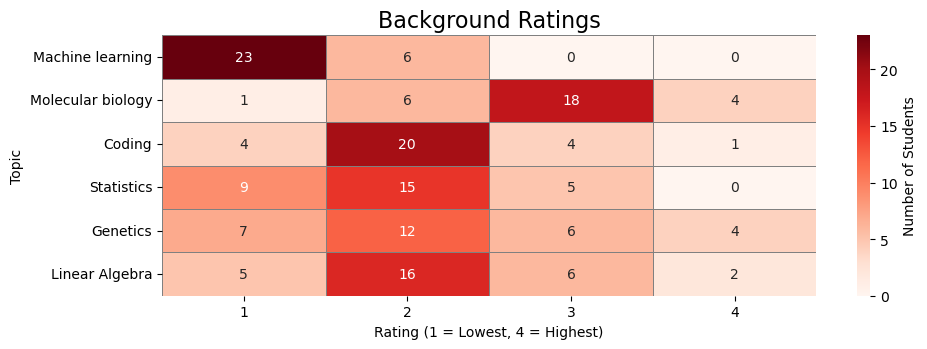

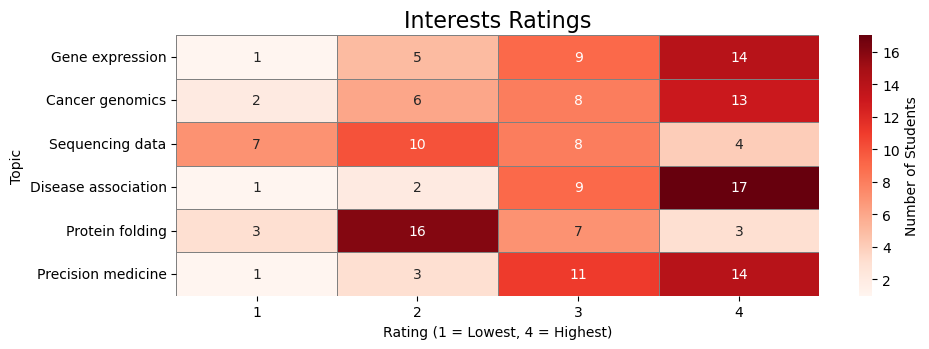

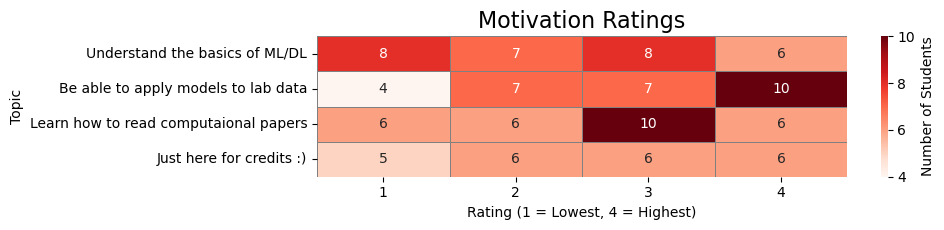

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (adjust path if needed)
file_path = "00660121 -  Medical Diagnostics_ Student Survery (Responses) - Form responses 1.csv"
df = pd.read_csv(file_path)

# Convert ranking answers to numeric values (1-4)
def extract_numeric(response):
    if pd.isnull(response):
        return None
    for i in range(1, 5):
        if str(i) in response:
            return i
    return None

# Define question groups
background_cols = [col for col in df.columns if col.startswith("Background")]
interests_cols = [col for col in df.columns if col.startswith("Interests")]
motivation_cols = [
    col for col in df.columns
    if col.startswith("Motivation") and not col.endswith("?")
]

# Apply numeric transformation
df_numeric = df.copy()
for col in background_cols + interests_cols + motivation_cols:
    df_numeric[col] = df[col].apply(extract_numeric)

# Heatmap plotting function
def plot_heatmap_with_color(group_cols, title):
    counts = pd.DataFrame(0, index=group_cols, columns=range(1, 5))
    for col in group_cols:
        responses = df_numeric[col].dropna().astype(int)
        for rank in range(1, 5):
            counts.loc[col, rank] = (responses == rank).sum()

    # Clean row names
    counts.index = [
        col.replace("Background [", "")
           .replace("Interests [", "")
           .replace("Motivation [", "")
           .replace("]", "")
        for col in counts.index
    ]

    # Plot heatmap
    plt.figure(figsize=(10, len(group_cols) * 0.6))
    ax = sns.heatmap(
        counts,
        annot=True,
        fmt="d",
        cmap="Reds",
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': 'Number of Students'}
    )
    ax.set_xlabel("Rating (1 = Lowest, 4 = Highest)")
    ax.set_ylabel("Topic")
    ax.set_title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Heatmaps
plot_heatmap_with_color(background_cols, "Background Ratings")
plot_heatmap_with_color(interests_cols, "Interests Ratings")
plot_heatmap_with_color(motivation_cols, "Motivation Ratings")


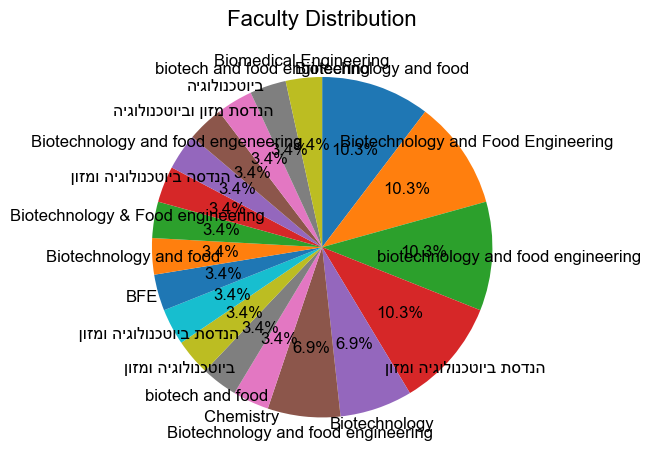

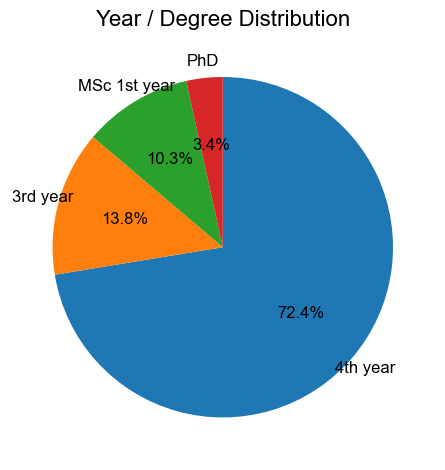

In [3]:
# Improve handling of Hebrew by enabling RTL rendering in pie labels using Matplotlib's text direction control
# This approach sets alignment and uses a right-to-left override

from matplotlib import rcParams
import matplotlib

# Ensure the correct font that supports Hebrew is used
rcParams['font.family'] = 'Arial'  # Arial generally supports Hebrew

# Function to reverse RTL Hebrew labels manually
def reverse_hebrew(text):
    # Only reverse if it contains Hebrew characters
    if any('\u0590' <= c <= '\u05FF' for c in text):
        return text[::-1]
    return text

# Replot with reversed Hebrew labels
def plot_pie_hebrew_fixed(column, title):
    data = df[column].dropna().value_counts()
    labels = [reverse_hebrew(label) for label in data.index]

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        textprops={'fontsize': 12, 'horizontalalignment': 'center'}
    )
    ax.set_title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot with Hebrew fixes
plot_pie_hebrew_fixed('Faculty', "Faculty Distribution")
plot_pie_hebrew_fixed('Year / Degree', "Year / Degree Distribution")